# Final Project

## Dataset loading and processing

* What is the "name" of the dataset?
* Where did you obtain it?
* Where can we obtain it? (i.e., URL)
* What is the license of the dataset? What are we allowed to do with it?  This information is generally found in an "About" page or in documentation.  If there is no explicit license, use what you find in the dataset documentation to make your "best guess".
* How big is it in file size and in items?  Looking ahead, [how does this relate to GitHub's limits on uploading large files](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github)?  If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue.  (Note: your plan might change a little bit from what you propose here and that is ok!)
* Make a simple plot showing a relationship of interest. You can use matplotlib or pandas (or other). Don't worry about colors, labels or anything else of that nature!  Include a few sentences about what your plot is aiming to show and why it is interesting.


                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

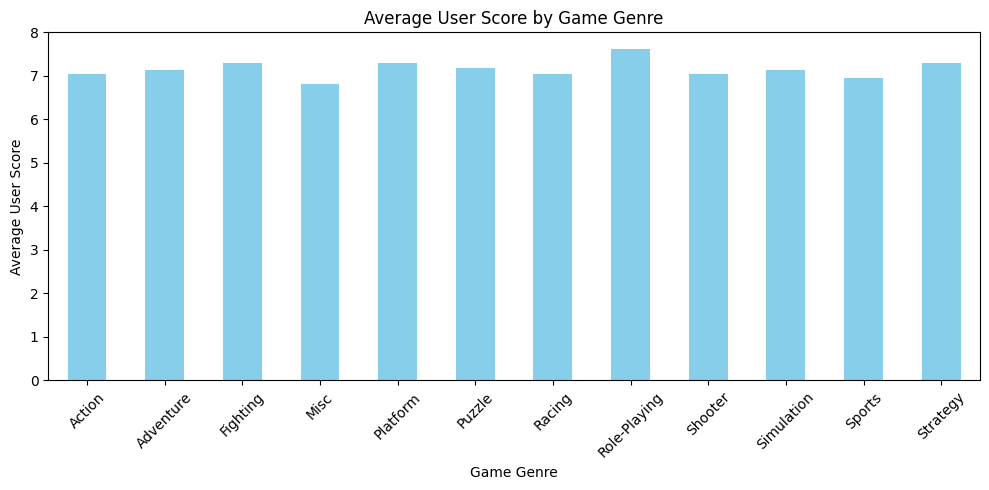

In [1]:
# Dataset Information
dataset_name = "Steam Games Dataset"
dataset_url = "https://query.data.world/s/kj67krqip3fnhjakq46hryp4f45m6d"
dataset_license = "Not mentioned on data.world."
dataset_size = "1.45 MB"
dataset_items = "16,719 rows and 16 columns"

import pandas as pd
# Load the dataset
df = pd.read_csv('https://query.data.world/s/kj67krqip3fnhjakq46hryp4f45m6d')

# Basic data exploration
print(df.head())  # Displays the first five rows of the dataset
print(df.describe())  # Provides statistical summary for numerical columns
print(df.info())  # Gives details about column data types and non-null values


# Relationship of Interest: User_Score v.s. Genre
import matplotlib.pyplot as plt

# Check the data type of 'User_Score' and attempt to convert it to numeric
print("Data type before conversion:", df['User_Score'].dtype)

# Convert 'User_Score' to a numeric type (float), coercing errors to NaN
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Calculate the mean user score for each genre
genre_user_score_mean = df.groupby('Genre')['User_Score'].mean()

# Plotting the results
genre_user_score_mean.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Average User Score by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Average User Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit in the plot window
plt.show()


The plot shows the average user score across different game genres. It’s interesting as it reveals which genres are rated highest by players, providing insights into consumer preferences and potential trends within the gaming community.

## Viz1



In [5]:
import ipywidgets as widgets
import altair as alt
# Create a dropdown for genre selection
# Filter out rows where 'Genre' is NaN
df = df.dropna(subset=['Genre'])

# Rest of your code for

alt.data_transformers.disable_max_rows()

genre_dropdown = alt.binding_select(options=df['Genre'].unique(), name='Genre: ')
selected_genre = alt.selection_point(fields=['Genre'], bind=genre_dropdown, name='Select')

# Create the histogram
histogram = alt.Chart(df).mark_bar().encode(
    x=alt.X('User_Score:Q', bin=True, title='User Score'),
    y=alt.Y('count()', title='Number of Games'),
    tooltip=['count()'],
    color='Genre:N'
).transform_filter(
    selected_genre
).properties(
    width=600,
    height=400,
    title='User Scores Distribution for Selected Genre'
)

# Combine the histogram with the dropdown
interactive_plot = histogram.add_params(selected_genre)

# Display the plot
interactive_plot
interactive_plot.save('viz1.json', format='json')

## Viz2



In [ ]:
import bqplot
import json
# Grouping data for the pie chart
genre_counts = df['Genre'].value_counts()
labels = genre_counts.index.tolist()  # Convert index to list
sizes = genre_counts.values
# Define base colors for each slice and a highlight color for click
base_colors = bqplot.CATEGORY10 * (len(sizes) // len(bqplot.CATEGORY10) + 1)
highlight_color = 'red'  # This will be the click highlight color

# Create a Pie chart with the base colors

#pie_chart = bqplot.Pie(sizes=sizes, labels=labels, sort=False, colors=base_colors[:len(sizes)])
#change the display type to outside for better readability
pie_chart = bqplot.Pie(sizes=sizes, labels=labels, sort=False, display_labels='outside', 
                       colors=base_colors[:len(sizes)])

# Create a Label widget to display the selected slice details
label = widgets.Label()
def click_handler(self, content):
    # This will display the label and size when a pie slice is clicked
    label.value = f'Genre: {content["data"]["label"]}, Games: {content["data"]["size"]}'

    # Change the color of the clicked slice
    new_colors = base_colors[:len(sizes)].copy()
    new_colors[content['data']['index']] = highlight_color
    pie_chart.colors = new_colors
# Add click event handler
pie_chart.on_element_click(click_handler)

# Create a Figure for the pie chart
fig = bqplot.Figure(marks=[pie_chart])

fig_json = json.dumps(fig.get_state())

# Save the serialized state to a JSON file
with open('viz2.json', 'w') as f:
    f.write(fig_json)

## Viz3



In [2]:
# First, group and count developers by country
url = 'https://query.data.world/s/iklsrscwy2hd6t7zhbe5e4n3napava?dws=00000'
df2 = pd.read_csv(url, encoding='ISO-8859-1')
df2['Country'] = df2['Country'].replace('US', 'United States')
country_counts = df2['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
import pycountry

def get_country_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return None

country_counts['country_code'] = country_counts['Country'].apply(get_country_code)
    
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=country_counts['country_code'],
    z=country_counts['Count'],
    text=country_counts['Country'],
    colorscale='Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Number of Developers'
))

fig.update_layout(
    title_text='Global Distribution of Video Game Developers',
    geo=dict(
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Convert the figure to a JSON string
fig_json = fig.to_json()

# Save this JSON string to a file
with open('viz3.json', 'w') as json_file:
    json_file.write(fig_json)


## Viz4



In [8]:
merged_df = pd.merge(df, df2, left_on='Developer', right_on='Developer', how='inner')
import altair as alt

# Aggregating sales data for each developer
developer_sales = merged_df.groupby('Developer')['Global_Sales'].sum().reset_index()

# Sorting by sales and getting the top 10 selling developers
top_developers = developer_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Displaying the top 10 developers
top_developers
chart = alt.Chart(top_developers).mark_bar().encode(
    x=alt.X('Developer:N', sort='-y', title='Developer'),
    y=alt.Y('Global_Sales:Q', title='Global Sales (in millions)'),
    color=alt.Color('Global_Sales:Q', scale=alt.Scale(scheme='viridis')),
    tooltip=['Developer:N', 'Global_Sales:Q']
).properties(
    title='Top 10 Video Game Developers by Global Sales',
    width=600,
    height=400
)

chart.save('viz4.json', format='json')